## Telecom churn Analysis

### Analysis on churn data and information on specific Telecom company that wants to develop customer retention strategy.

### Task and Goal

* Here, we are going to analyze and process the given dataset. 
* The final goal is to come up with favorable information and strategy that will help the Telecom to cut churn and retain its customers.
* So, initially, we aim at finding the internal connection between different columns or categories of the given dataset.

## import relevant packages

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import plotly
import plotly.graph_objects as go
import plotly.express as px
sns.set()

import dataset

In [2]:
telecom = pd.read_csv('Telecom Churn.csv')
telecom.shape

(3333, 20)

In [3]:
# To see first five rows
telecom.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [5]:
# To check missing values
telecom.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [6]:
# To check duplicates values
display(telecom[telecom[telecom.columns.tolist()].duplicated() == True])

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn


In [7]:
# Changing the column names into small letters
telecom.columns = telecom.columns.str.lower()
telecom.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')

# Exploratory Data Analysis

#### Looking at the dataset and studying the mean values and standard deviation 

In [107]:
# convert True to 1 and False to 0
telecom['churn'] =telecom['churn'].replace({True: 1, False: 0})

In [108]:
# convert voice mail plan , Yes to 1 and No to 0
telecom['voice mail plan'] =telecom['voice mail plan'].replace({'No': 0, 'Yes': 1})

In [109]:
# convert international plan , Yes to 1 and No to 0
telecom['international plan'] =telecom['international plan'].replace({'No': 0, 'Yes': 1})

In [110]:
telecom.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


#### Looking at the mean features values in two groups: for those who left(churn) and for those who stayed

In [12]:
# Overview the churned and retained data
churned_telecom = telecom.query(' churn == 1')
retained_telecom = telecom.query(' churn == 0')
display(churned_telecom.head())
display(retained_telecom.head())

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
10,IN,65,415,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
15,NY,161,415,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
21,CO,77,408,0,0,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,1
33,AZ,12,408,0,0,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,1
41,MD,135,408,1,1,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,0,1


,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [13]:
columns1 =["area code", "international plan", "voice mail plan"]

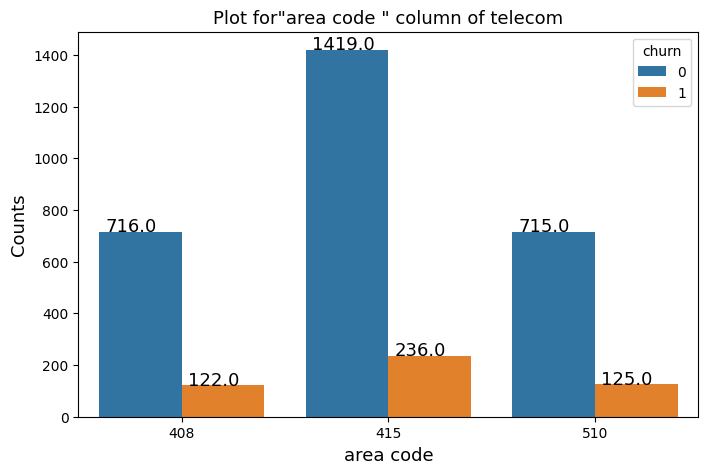

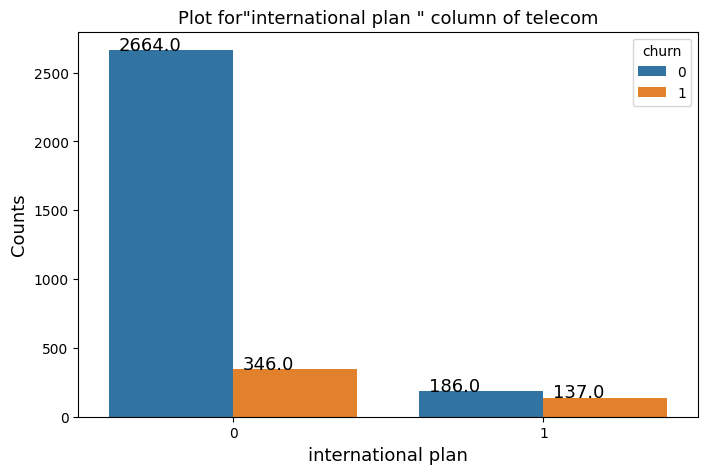

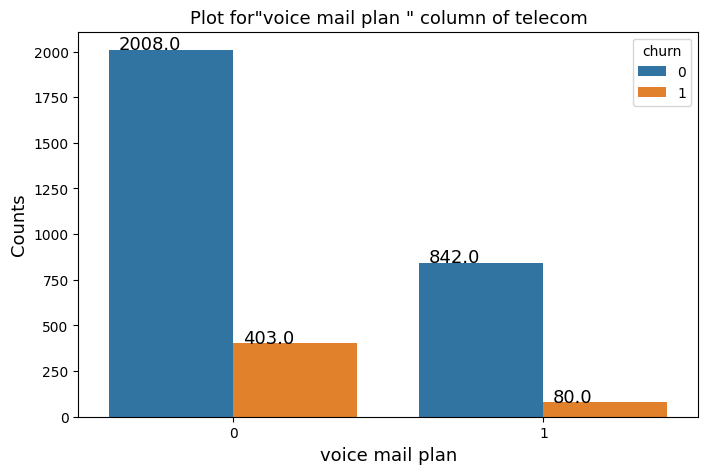

In [14]:
#Visualization for different column in columns1 for telecom data
for j in columns1:
    fig_dims = (8, 5)
    fig, ax = plt.subplots(figsize =fig_dims)
    
    plt.title('Plot for"' + j + ' " column of telecom', fontsize = 13)
    sns.countplot(x = j, hue = 'churn', data = telecom)
    
    plt.xlabel( j, fontsize =13)
    plt.ylabel( 'Counts', fontsize =13)
    
    for i in ax.patches:
        # get_x pulls left or right; get_height pushes up or down
        ax.text(i.get_x()+ 0.03, i.get_height()+1, str(round((i.get_height()), 2)), fontsize =13)
        
    plt.show()

In [15]:
#Visualization for different column in columns1 for telecom data
#fig, axes = plt.subplots(3, 2, figsize =(10,8))

# plot 1

#sns.histplot(data = telecom, x="total day minutes", bins = 10, hue = 'churn', ax = axes[0, 0])
#axes[0, 0].set_xlabel('Total Day Minutes')
#axes[0, 0].set_ylabel('Frequency')
#axes[0, 0].set_title('Histogram of Total Day Minutes')

# plot 2
#sns.histplot(data = telecom, x="total day calls", bins = 10, hue = 'churn', ax = axes[0, 1])
#axes[0, 1].set_xlabel('Total Day Calls')
#axes[0, 1].set_ylabel('Frequency')
#axes[0, 1].set_title('Histogram of Total Day Calls')

#plot 3


#sns.histplot(data = telecom, x="total eve calls", bins = 10, hue = 'churn', ax = axes[1, 0])
#axes[1, 0].set_xlabel('Total Eve Calls')
#axes[1, 0].set_ylabel('Frequency')
#axes[1, 0].set_title('Histogram of Total Eve Calls')

#plot 4

#sns.histplot(data = telecom, x="total eve minutes", bins = 10, hue = 'churn', ax = axes[1, 1])
#axes[1, 1].set_xlabel('Total Eve minutes')
#axes[1, 1].set_ylabel('Frequency')
#axes[1, 1].set_title('Histogram of Total Eve minutes')

# plot 5

#sns.histplot(data = telecom, x="total eve charge", bins = 10,hue = 'churn' ,ax = axes[2, 1])
#axes[2, 1].set_xlabel('Total Eve charge')
#axes[2, 1].set_ylabel('Frequency')
#axes[2, 1].set_title('Histogram of Total Eve charge')

# plot 6

#sns.histplot(data = telecom, x="total night minutes", bins = 10,hue = 'churn',  ax = axes[2, 0])
#axes[2, 0].set_xlabel('Total night minutes')
#axes[2, 0].set_ylabel('Frequency')
#axes[2, 0].set_title('Histogram of Total night minutes')



# adjust layout to avoid overlappping labels
#plt.tight_layout()

# show the subplots
#plt.show()

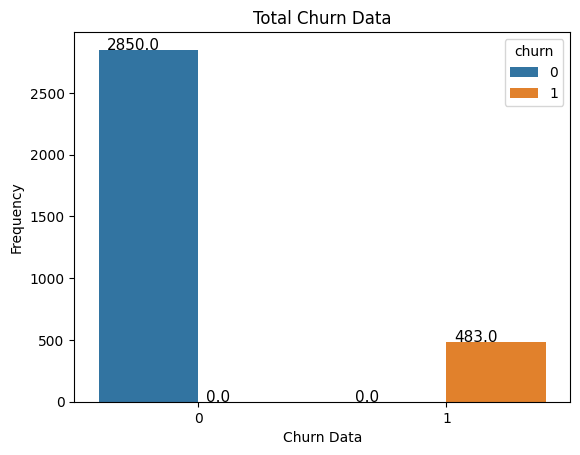

In [16]:
# Graph histogram for churn data
ax = sns.countplot(data = telecom, x="churn", hue = 'churn')
for i in ax.patches:
    ax.text(i.get_x()+.03, i.get_height()+1, str(round((i.get_height()), 2)), fontsize=11)
plt.xlabel('Churn Data')
plt.ylabel('Frequency')
plt.title('Total Churn Data')
plt.show()

* imbalanced Dataset


In [17]:
columns_list =['total night calls','total day calls', 'total eve calls','total eve minutes',
               'total eve charge', 'total night minutes','total night calls','total night charge','total intl minutes',
             'total intl calls','total intl charge','customer service calls' ]

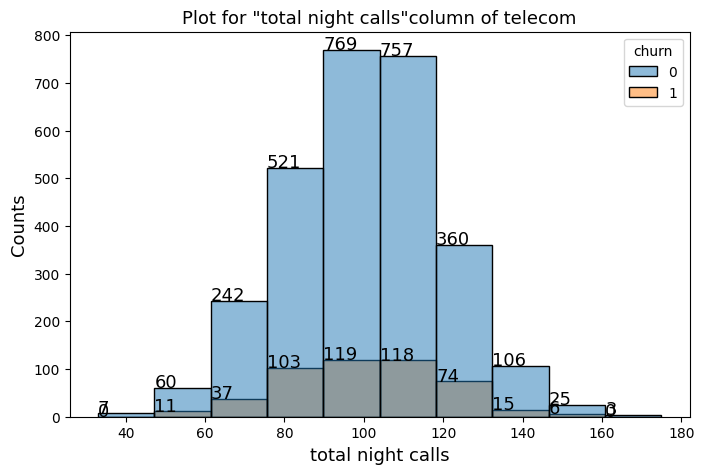

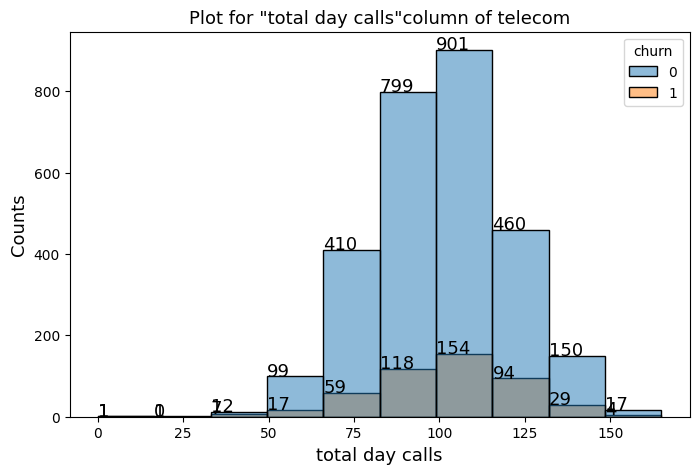

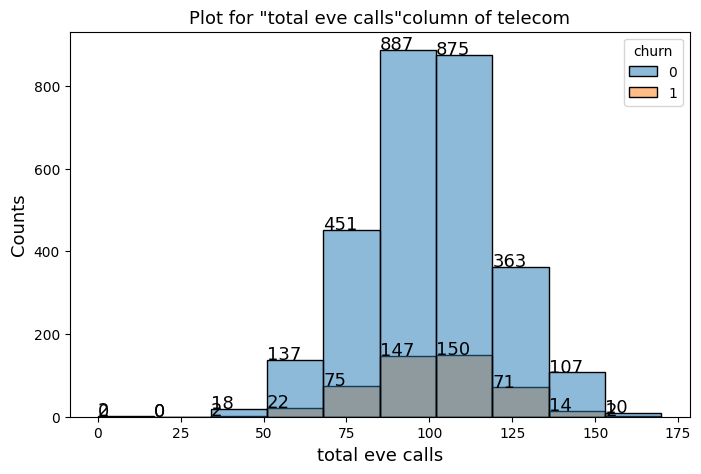

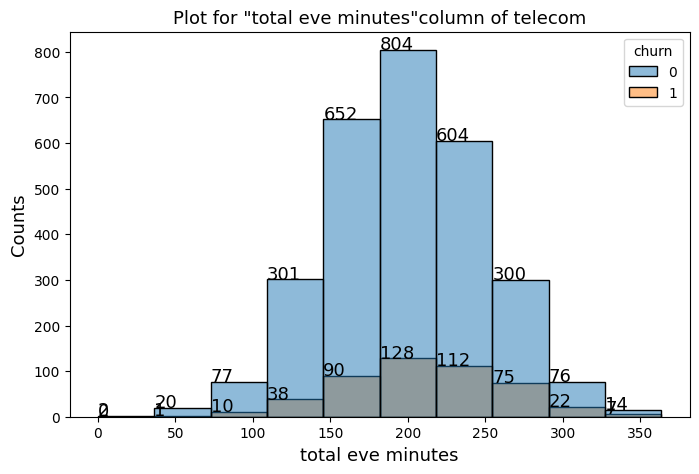

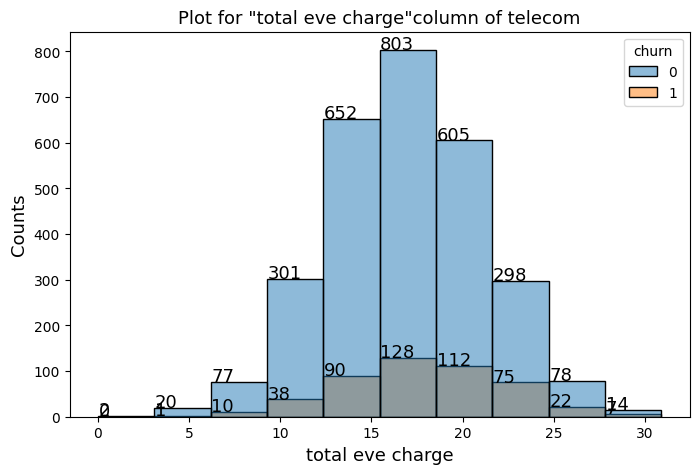

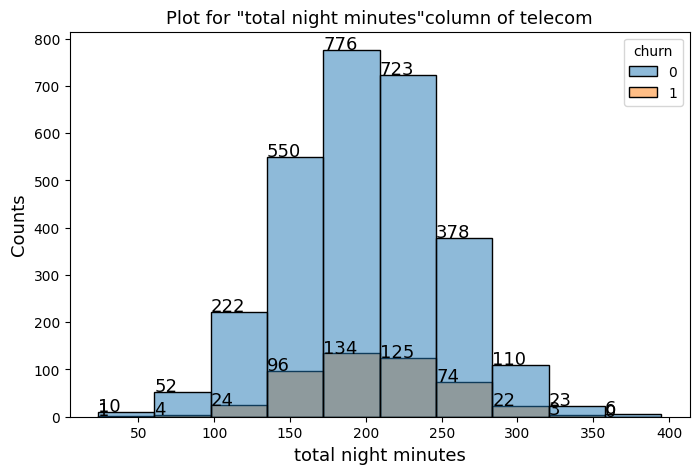

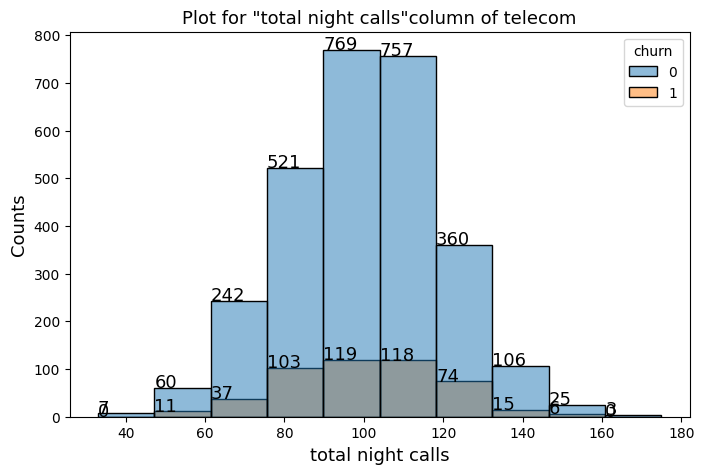

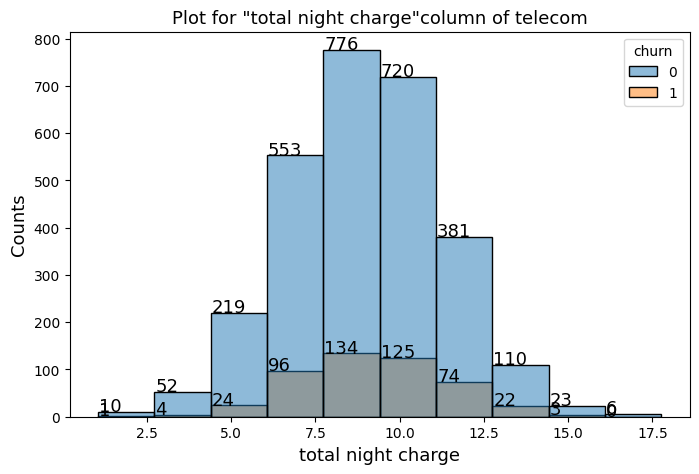

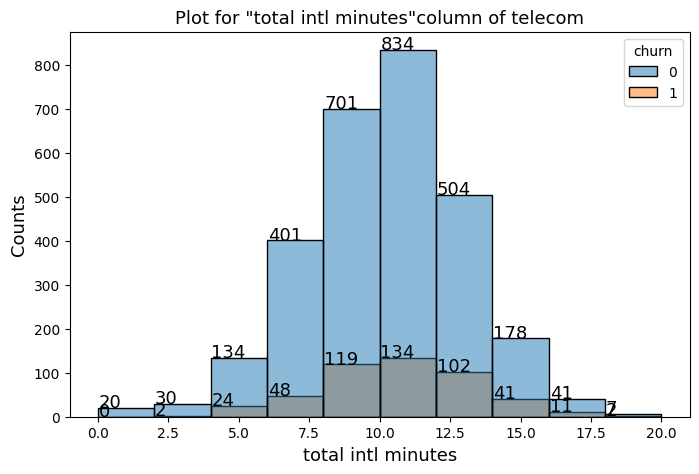

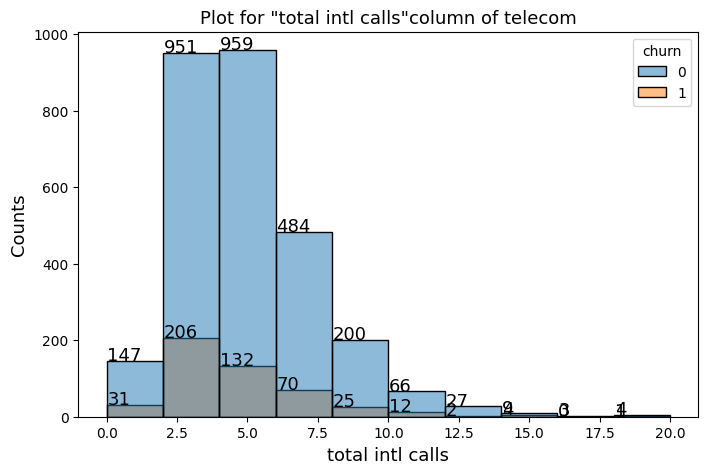

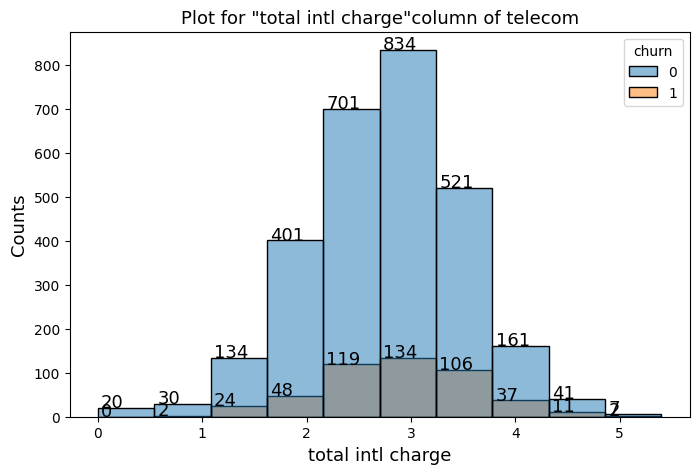

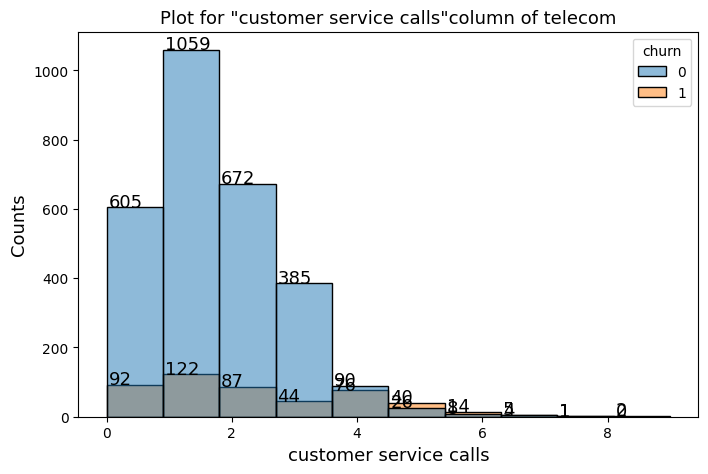

In [18]:
#Visualization for different column in columns1 for telecom data
for k in columns_list:
    fig_dims = (8, 5)
    fig, ax = plt.subplots(figsize =fig_dims)
    
    plt.title('Plot for "' + k + '"column of telecom', fontsize = 13)
    sns.histplot(x = k,bins = 10, hue = 'churn', data = telecom)
    
    plt.xlabel( k, fontsize =13)
    plt.ylabel( 'Counts', fontsize =13)
    
    for i in ax.patches:
        # get_x pulls left or right; get_height pushes up or down
        ax.text(i.get_x()+ 0.03, i.get_height()+1, str(round((i.get_height()), 2)), fontsize =13)
        
    plt.show()

In [111]:
#visualization for different columns in columns_list2 for churned_gym_data & retained_gym_data

for j in columns_list:

    fig = go.Figure()
    fig.add_trace(go.Histogram(
        x=churned_telecom[j],
        #histnorm='density',
        name='churn', # name used in legend and hover labels
        marker_color='#EB89B5',
        opacity=0.75
        
    ))
    fig.add_trace(go.Histogram(
        x=retained_telecom[j],
        #histnorm='density',
        name='retain',
        marker_color='#330C73',
        opacity=0.75
        
    ))

    fig.update_layout(
        title_text='Plot for column: ' + j , # title of plot
        xaxis_title_text= j , # xaxis label
        yaxis_title_text='Count', # yaxis label
        bargap=0.2, # gap between bars of adjacent location coordinates
        bargroupgap=0.1 # gap between bars of the same location coordinates
    )

    fig.show()



In [20]:
# drop the object column
drop_column = 'state'
telecom_df = telecom.drop(drop_column, axis =1)
display(telecom_df)

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


#### Builiding a correlation matrix and representation

In [21]:
corr_telecom = telecom_df.corr()
display(corr_telecom)

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
account length,1.000000,-0.012463,0.024735,0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
area code,-0.012463,1.000000,0.048551,-0.000747,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
international plan,0.024735,0.048551,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,0.019106,-0.028905,0.012451,-0.028913,0.045871,0.017366,0.045780,-0.024522,0.259852
voice mail plan,0.002918,-0.000747,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,0.021559,0.006079,0.015553,0.006064,-0.001318,0.007618,-0.001276,-0.017824,-0.102148
number vmail messages,-0.004628,-0.001994,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total day minutes,0.006216,-0.008264,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total day calls,0.038470,-0.009646,0.003755,-0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total day charge,0.006214,-0.008264,0.049398,-0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total eve minutes,-0.006757,0.003580,0.019100,0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
total eve calls,0.019260,-0.011886,0.006114,-0.006444,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233


In [112]:
### Heatmap of the given features

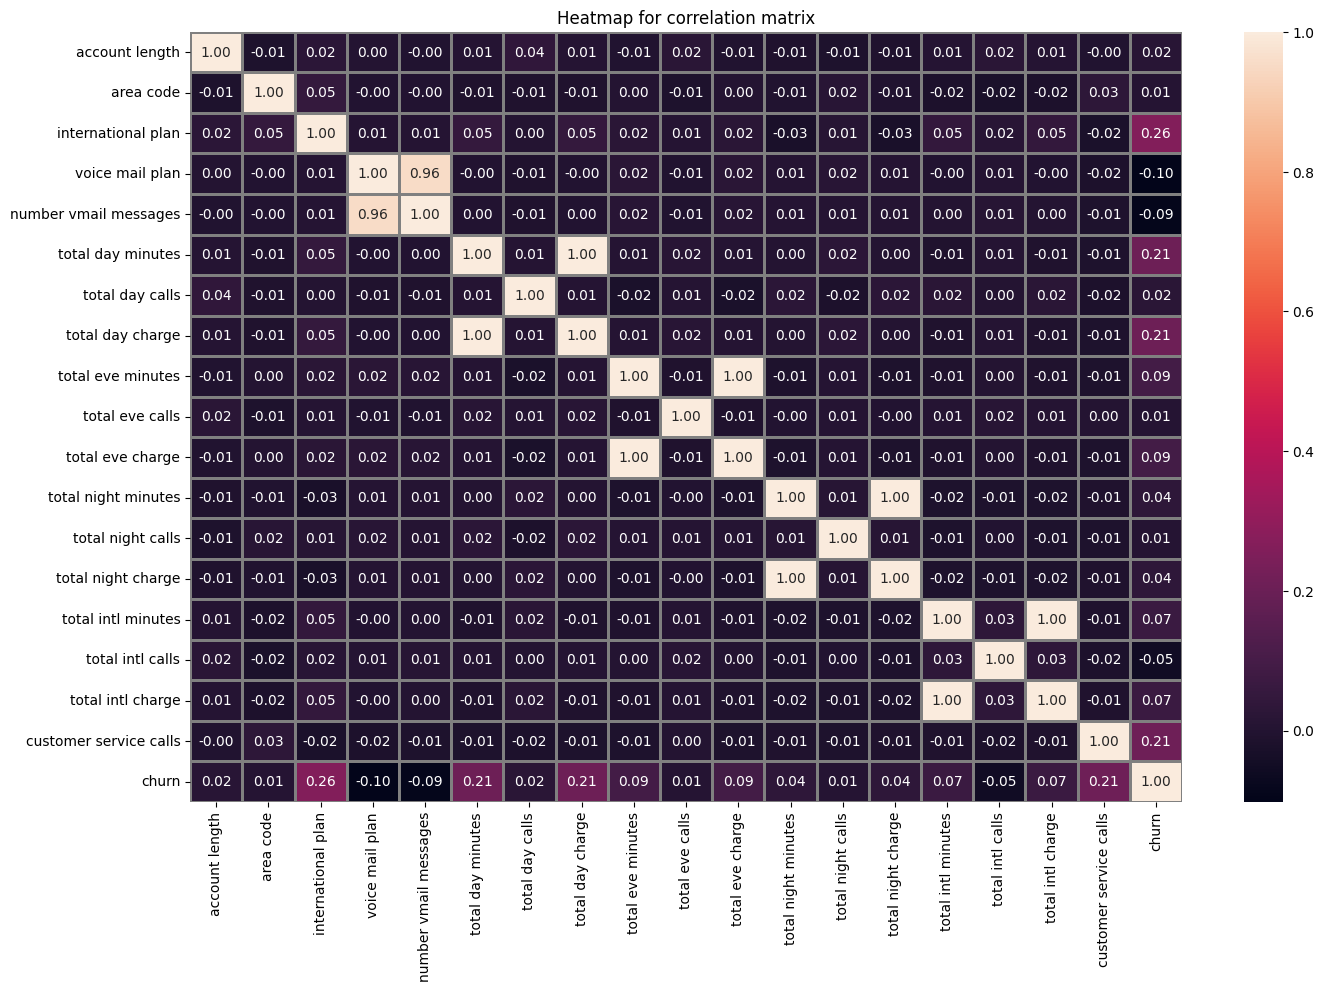

In [22]:
plt.figure(figsize=(16, 10))
plt.title('Heatmap for correlation matrix')
sns.heatmap(
    corr_telecom,
    annot=True,
    fmt='.2f',
    linewidths=.8,
    linecolor='gray',
)

plt.show()

* Churn has relationship with international plan, total day charge, and customer service calls

# Building Machine Model 

##### Create new dataframe using 'international plan', 'total day charge', 'customer service calls', 'churn'

In [40]:
raw_data = telecom_df[['international plan', 'total day charge', 'customer service calls', 'churn']].copy()
raw_data

,international plan,total day charge,customer service calls,churn
0,0,45.07,1,0
1,0,27.47,1,0
2,0,41.38,0,0
3,1,50.90,2,0
4,1,28.34,3,0
...,...,...,...,...
3328,0,26.55,2,0
3329,0,39.29,3,0
3330,0,30.74,2,0
3331,1,36.35,2,0


## Declare the dependent and the independent variables

In [79]:
y = raw_data['churn']
x = raw_data[['international plan', 'total day charge', 'customer service calls']]

In [80]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Regression for X_train_scaled

In [82]:
X_train_scaled = sm.add_constant(X_train_scaled)
reg_log = sm.Logit(y_train,X_train_scaled)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.340654
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                 2666
Model:                          Logit   Df Residuals:                     2662
Method:                           MLE   Df Model:                            3
Date:                Mon, 14 Aug 2023   Pseudo R-squ.:                  0.1709
Time:                        21:15:23   Log-Likelihood:                -908.18
converged:                       True   LL-Null:                       -1095.4
Covariance Type:            nonrobust   LLR p-value:                 7.506e-81
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1620      0.072    -30.010      0.000      -2.303      -2.021
x1             0.5881      0.046     12.826      0.000       0.498       0.678
x2             0.6178      0.063      9.765      0.000       0.494       0.742
x3             0.6531      0.056     11.712      0.000       0.544       0.762
==============================================================================
"""

In [93]:
# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_binary))
print("\nClassification Report:\n", classification_report(y_test, y_pred_binary))

Confusion Matrix:
 [[553  13]
 [ 87  14]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92       566
           1       0.52      0.14      0.22       101

    accuracy                           0.85       667
   macro avg       0.69      0.56      0.57       667
weighted avg       0.81      0.85      0.81       667



## Accuracy

In [99]:
results_log.pred_table()

array([[2227.00, 57.00],
       [325.00, 57.00]])

## Confusion Matrix

In [98]:
cmatrix_df = pd.DataFrame(results_log.pred_table())
cmatrix_df.columns = ['Predicted 0', 'Predicted 1']
cmatrix_df.rename(index = {0:'Actual 0', 1:'Actual 1'})
cmatrix_df


,Predicted 0,Predicted 1
0,2227.0,57.0
1,325.0,57.0


In [100]:
cm = np.array(cmatrix_df)
accuracy_train = (cm[0,0] + cm[1,1])/cm.sum()
accuracy_train

0.8567141785446362

* Accuracy is around 86%

## Testing the model and assessing its accuracy

In [101]:
X_test_scaled = sm.add_constant(X_test_scaled)

In [102]:
# Make predictions
y_pred = results.predict(X_test_scaled)
y_pred_binary = (y_pred > 0.5).astype(int)

In [103]:
# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_binary))
print("\nClassification Report:\n", classification_report(y_test, y_pred_binary))

Confusion Matrix:
 [[553  13]
 [ 87  14]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92       566
           1       0.52      0.14      0.22       101

    accuracy                           0.85       667
   macro avg       0.69      0.56      0.57       667
weighted avg       0.81      0.85      0.81       667



In [104]:
# Print the coefficient estimates and their p-values
print(results.summary())

# Get the coefficient values
coef_values = results.params

# Get the corresponding feature names
feature_names = X.columns

# Pair feature names with their coefficients
coef_dict = dict(zip(feature_names, coef_values))

# Interpret the coefficients
for feature, coef in coef_dict.items():
    print(f"{feature}: {coef:.4f}")


                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 2666
Model:                          Logit   Df Residuals:                     2662
Method:                           MLE   Df Model:                            3
Date:                Mon, 14 Aug 2023   Pseudo R-squ.:                  0.1709
Time:                        21:43:13   Log-Likelihood:                -908.18
converged:                       True   LL-Null:                       -1095.4
Covariance Type:            nonrobust   LLR p-value:                 7.506e-81
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1620      0.072    -30.010      0.000      -2.303      -2.021
x1             0.5881      0.046     12.826      0.000       0.498       0.678
x2             0.6178      0.063      9.765      0.0

#### I would like to clarify that not all comments and analysis reports were included in this section of the project due to specific reasons. As a result, it would be inaccurate to consider this version as complete, even though it is a crucial and fundamental component of the project.

## Thank You very much